In [3]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

Using TensorFlow backend.


# IMPORTING DATA FROM CSV FILE

In [4]:
series = read_csv('MMMM.csv', header=0,squeeze=True,index_col=0,parse_dates=[0])
series 

DATE_TIME
2019-05-30 09:15:00     3
2019-05-30 09:30:00     5
2019-05-30 09:45:00     8
2019-05-30 10:00:00    25
2019-05-30 10:15:00    46
2019-05-30 10:30:00    21
2019-05-30 10:45:00    17
2019-05-30 11:00:00     8
2019-05-30 11:15:00    20
2019-05-30 11:30:00     6
2019-05-30 11:45:00    18
2019-05-30 12:00:00    16
2019-05-30 12:15:00    34
2019-05-30 12:30:00    16
2019-05-30 12:45:00    21
2019-05-30 13:00:00    15
2019-05-30 13:15:00    18
2019-05-30 13:30:00    53
2019-05-30 13:45:00    19
2019-05-30 14:00:00    14
2019-05-30 14:15:00    12
2019-05-30 14:30:00     9
2019-05-30 14:45:00    23
2019-05-30 15:00:00    50
2019-05-30 15:15:00    41
2019-05-30 15:30:00    21
2019-05-30 15:45:00    18
2019-05-30 16:00:00    27
2019-05-30 16:15:00    21
2019-05-30 16:30:00     9
                       ..
2019-06-07 03:30:00     0
2019-06-07 03:45:00     2
2019-06-07 04:00:00     0
2019-06-07 04:15:00     0
2019-06-07 04:30:00     0
2019-06-07 04:45:00     0
2019-06-07 05:00:00     0
20

In [5]:
series.tail(250)

DATE_TIME
2019-06-04 20:30:00     9
2019-06-04 20:45:00    48
2019-06-04 21:00:00    67
2019-06-04 21:15:00    13
2019-06-04 21:30:00    25
2019-06-04 21:45:00    28
2019-06-04 22:00:00     7
2019-06-04 22:15:00    25
2019-06-04 22:30:00     8
2019-06-04 22:45:00    17
2019-06-04 23:00:00    13
2019-06-04 23:15:00    26
2019-06-04 23:30:00    11
2019-06-04 23:45:00    11
2019-06-05 00:00:00    16
2019-06-05 00:15:00    28
2019-06-05 00:30:00    21
2019-06-05 00:45:00    14
2019-06-05 01:00:00     2
2019-06-05 01:15:00     0
2019-06-05 01:30:00     0
2019-06-05 01:45:00     2
2019-06-05 02:00:00     0
2019-06-05 02:15:00     1
2019-06-05 02:30:00     0
2019-06-05 02:45:00     2
2019-06-05 03:00:00     0
2019-06-05 03:15:00     4
2019-06-05 03:30:00     6
2019-06-05 03:45:00     0
                       ..
2019-06-07 03:30:00     0
2019-06-07 03:45:00     2
2019-06-07 04:00:00     0
2019-06-07 04:15:00     0
2019-06-07 04:30:00     0
2019-06-07 04:45:00     0
2019-06-07 05:00:00     0
20

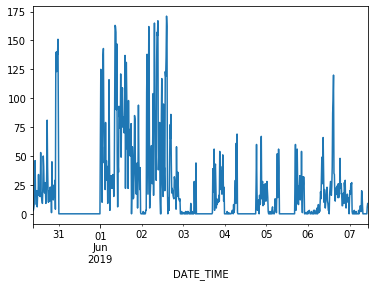

In [6]:
series.plot()

In [7]:
series.dtypes

dtype('int64')

In [8]:
series.values

array([  3,   5,   8,  25,  46,  21,  17,   8,  20,   6,  18,  16,  34,
        16,  21,  15,  18,  53,  19,  14,  12,   9,  23,  50,  41,  21,
        18,  27,  21,   9,  12,  37,  81,  40,  21,  10,  20,  11,  11,
        23,  14,  23,   1,  45,  18,  25,  12,  18,  19,  22,  29,   4,
       136, 140, 123, 140, 138, 151,  65,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  56,
       125,  95,  72,  10, 100, 136, 143,  76,  44,  58,  21,  79,  29,
        46,  33,  41,   9,  38,  26, 116,  57,   3,  24,  26,  3

# TRANSFORMING TO STATIONARY

In [9]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)


raw_values = series.values
diff_values = difference(raw_values, 1)

In [178]:
raw_values[-250:]

array([  9,  48,  67,  13,  25,  28,   7,  25,   8,  17,  13,  26,  11,
        11,  16,  28,  21,  14,   2,   0,   0,   2,   0,   1,   0,   2,
         0,   4,   6,   0,   1,   1,   0,   4,  13,   4,   8,   1,  21,
        52,  14,  22,  56,  40,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  33,  60,   3,   8,   9,  56,  29,  14,   8,  24,  19,
        33,  12,  20,  15,  54,  15,   1,  32,  24,  32,  26,   0,   0,
         1,   1,   0,   0,   0,   2,   0,   2,   2,   3,   1,   0,   0,
         0,   2,   1,   0,   0,   0,   3,   0,   3,   3,   0,   1,   1,
         0,   5,   0,   4,   8,   1,   6,   2,   9,  19,  13,  30,  49,
        26,  31,  66,  37,  10,  21,  10,   5,  10,  17,  21,  23,  11,
         9,   3,   3,   0,  17,  23,  28,  22,  16,  24,  40,  87,  98,
       120,  35,  34,  16,  11,  22,  17,  23,  24,  18,  14,  2

In [43]:
diff_values

0       2
1       3
2      17
3      21
4     -25
5      -4
6      -9
7      12
8     -14
9      12
10     -2
11     18
12    -18
13      5
14     -6
15      3
16     35
17    -34
18     -5
19     -2
20     -3
21     14
22     27
23     -9
24    -20
25     -3
26      9
27     -6
28    -12
29      3
       ..
744     0
745     2
746    -2
747     0
748     0
749     0
750     0
751     3
752    -3
753     2
754     1
755     4
756    -5
757     0
758    18
759    -2
760   -11
761    -7
762     0
763     0
764     0
765     0
766     0
767     0
768     0
769     0
770     0
771     6
772     3
773    -3
Length: 774, dtype: int64

In [98]:
raw_values

array([  3,   5,   8,  25,  46,  21,  17,   8,  20,   6,  18,  16,  34,
        16,  21,  15,  18,  53,  19,  14,  12,   9,  23,  50,  41,  21,
        18,  27,  21,   9,  12,  37,  81,  40,  21,  10,  20,  11,  11,
        23,  14,  23,   1,  45,  18,  25,  12,  18,  19,  22,  29,   4,
       136, 140, 123, 140, 138, 151,  65,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  56,
       125,  95,  72,  10, 100, 136, 143,  76,  44,  58,  21,  79,  29,
        46,  33,  41,   9,  38,  26, 116,  57,   3,  24,  26,  3

# TRANSFORMING DATA TO SUPERVISED

In [44]:
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df


supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

In [45]:
supervised_values

array([[ 0.,  2.],
       [ 2.,  3.],
       [ 3., 17.],
       ...,
       [ 0.,  6.],
       [ 6.,  3.],
       [ 3., -3.]])

In [46]:
supervised_values.size

1548

# SPLIT DATA INTO TRAINING AND TEST DATA SETS

In [73]:
train, test = supervised_values[0:-250], supervised_values[-250:]

In [174]:
supervised_values.size

1548

In [72]:
train.size

1048

In [74]:
test.size

500

# TRANSFORM INTO SCALED DATA

In [75]:
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled


scaler, train_scaled, test_scaled = scale(train, test)

In [79]:
test_scaled

array([[-3.70370370e-02,  2.96296296e-02],
       [ 2.96296296e-02,  3.11111111e-01],
       [ 3.11111111e-01,  1.62962963e-01],
       [ 1.62962963e-01, -3.77777778e-01],
       [-3.77777778e-01,  1.11111111e-01],
       [ 1.11111111e-01,  4.44444444e-02],
       [ 4.44444444e-02, -1.33333333e-01],
       [-1.33333333e-01,  1.55555556e-01],
       [ 1.55555556e-01, -1.03703704e-01],
       [-1.03703704e-01,  8.88888889e-02],
       [ 8.88888889e-02, -7.40740741e-03],
       [-7.40740741e-03,  1.18518519e-01],
       [ 1.18518519e-01, -8.88888889e-02],
       [-8.88888889e-02,  2.22222222e-02],
       [ 2.22222222e-02,  5.92592593e-02],
       [ 5.92592593e-02,  1.11111111e-01],
       [ 1.11111111e-01, -2.96296296e-02],
       [-2.96296296e-02, -2.96296296e-02],
       [-2.96296296e-02, -6.66666667e-02],
       [-6.66666667e-02,  7.40740741e-03],
       [ 7.40740741e-03,  2.22222222e-02],
       [ 2.22222222e-02,  3.70370370e-02],
       [ 3.70370370e-02,  7.40740741e-03],
       [ 7.

# FIT LSTM

In [80]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

lstm_model = fit_lstm(train_scaled, 1, 3000, 4)

W0727 00:37:37.668066 139625826219840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0727 00:37:37.707267 139625826219840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0727 00:37:37.715427 139625826219840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0727 00:37:38.110968 139625826219840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0727 00:37:38.336961 139625826219840 deprecation.py:323

In [81]:
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

array([[ 0.0299298 ],
       [ 0.02408177],
       [ 0.0289229 ],
       [ 0.03821019],
       [ 0.04029392],
       [ 0.04932716],
       [ 0.08617818],
       [ 0.05548213],
       [ 0.0952258 ],
       [ 0.05223806],
       [ 0.07050472],
       [ 0.0543088 ],
       [ 0.05454337],
       [ 0.05398955],
       [ 0.02958593],
       [ 0.05398956],
       [ 0.02564163],
       [-0.01668325],
       [ 0.00189025],
       [ 0.07892717],
       [ 0.09796676],
       [ 0.08938705],
       [ 0.10605892],
       [ 0.03161265],
       [ 0.03182189],
       [ 0.06673029],
       [ 0.10059112],
       [ 0.04057389],
       [ 0.0445318 ],
       [ 0.03134879],
       [ 0.05702537],
       [ 0.02871016],
       [-0.02877531],
       [ 0.00866216],
       [ 0.08493124],
       [ 0.10483588],
       [ 0.0545955 ],
       [ 0.07530515],
       [ 0.02661439],
       [ 0.02645951],
       [ 0.07080173],
       [ 0.10641835],
       [ 0.09812016],
       [ 0.10564915],
       [ 0.03801067],
       [ 0

# VALIDATION ON TEST DATA

In [243]:
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]


def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]


def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]


predictions = list()
for i in range(len(test_scaled)):
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
    yhat = invert_scale(scaler, X, yhat)
	# invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
    if yhat < 0:
        yhat=0
        
    predictions.append(yhat)
    expected = raw_values[len(train) + i + 1]
    print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
    
    


Month=1, Predicted=1.162468, Expected=9.000000
Month=2, Predicted=2.115651, Expected=48.000000
Month=3, Predicted=41.115327, Expected=67.000000
Month=4, Predicted=60.115327, Expected=13.000000
Month=5, Predicted=13.477822, Expected=25.000000
Month=6, Predicted=29.409308, Expected=28.000000
Month=7, Predicted=35.374120, Expected=7.000000
Month=8, Predicted=9.083414, Expected=25.000000
Month=9, Predicted=29.717452, Expected=8.000000
Month=10, Predicted=8.327243, Expected=17.000000
Month=11, Predicted=19.291053, Expected=13.000000
Month=12, Predicted=14.132767, Expected=26.000000
Month=13, Predicted=29.394548, Expected=11.000000
Month=14, Predicted=12.205611, Expected=11.000000
Month=15, Predicted=15.685523, Expected=16.000000
Month=16, Predicted=16.445984, Expected=28.000000
Month=17, Predicted=29.228721, Expected=21.000000
Month=18, Predicted=25.738133, Expected=14.000000
Month=19, Predicted=22.048316, Expected=2.000000
Month=20, Predicted=3.664296, Expected=0.000000
Month=21, Predicted

Test RMSE: 14.224


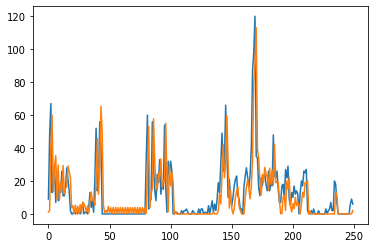

In [244]:
    
rmse = sqrt(mean_squared_error(raw_values[-250:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-250:])
pyplot.plot(predictions)
pyplot.show()

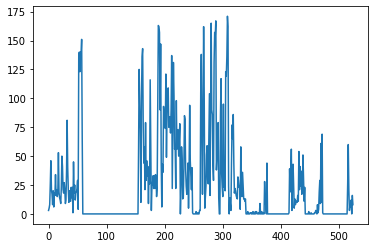

In [10]:
pyplot.plot(raw_values[0:-250])
pyplot.show()

In [245]:
predictions


[1.1624680086970143,
 2.115650720894318,
 41.11532684415577,
 60.11532684415577,
 13.477821610867958,
 29.40930803120134,
 35.37411995232103,
 9.083413887768964,
 29.717452105134704,
 8.327243067324142,
 19.29105257242916,
 14.132766760885696,
 29.394547894597032,
 12.205610863864402,
 15.685522586107234,
 16.44598412513731,
 29.22872077673672,
 25.738133445382097,
 22.04831565171478,
 3.664295762777309,
 4.852040994912366,
 0.37913978844879126,
 5.3027675636112495,
 0.3272430673241422,
 4.711630262434463,
 0.3272430673241422,
 5.534060817211847,
 0.3272430673241422,
 7.178922429680805,
 6.327243067324142,
 4.288590017706136,
 1.3504424989223287,
 4.785802058875541,
 0.3272430673241422,
 7.178922429680805,
 13.327243067324142,
 8.288590017706136,
 8.395911976695041,
 5.288590017706136,
 21.702662475407106,
 45.873980946838834,
 11.924422666430454,
 30.267820596694925,
 65.33317591249941,
 49.0927497372031,
 5.224106468260269,
 0.7217943370342061,
 2.130744650959949,
 1.0032402053475187

In [246]:
predicted_dataframe = pd.DataFrame(predictions,columns=['Predicted']) 


In [247]:
#predicted_dataframe.set_index('Predicted')

In [248]:
real_dataframe = pd.DataFrame(raw_values[-250:],columns=['Expected']) 
real_dataframe.count()

Expected    250
dtype: int64

In [249]:


#df1 = predicted_dataframe.append(real_dataframe)
#df2 = real_dataframe.append(predicted_dataframe)

In [250]:
#result=predicted_dataframe.join(real_dataframe)
response = pd.merge(predicted_dataframe, real_dataframe, left_index=True, right_index=True)

In [251]:
response

,Predicted,Expected
0,1.162468,9
1,2.115651,48
2,41.115327,67
3,60.115327,13
4,13.477822,25
5,29.409308,28
6,35.374120,7
7,9.083414,25
8,29.717452,8
9,8.327243,17


In [252]:
datetimeframe=read_csv('MMMM.csv')

In [253]:
datetimeframe=datetimeframe.tail(250)

In [254]:
datetimeframe=datetimeframe.set_index('DATE_TIME')

In [255]:
datetimeframe=datetimeframe.reset_index()

In [256]:
datetimeframe

,DATE_TIME,Motion
0,2019-06-04 20:30:00,9
1,2019-06-04 20:45:00,48
2,2019-06-04 21:00:00,67
3,2019-06-04 21:15:00,13
4,2019-06-04 21:30:00,25
5,2019-06-04 21:45:00,28
6,2019-06-04 22:00:00,7
7,2019-06-04 22:15:00,25
8,2019-06-04 22:30:00,8
9,2019-06-04 22:45:00,17


In [257]:
responseresultsfinal = pd.merge(datetimeframe,predicted_dataframe, left_index=True, right_index=True)

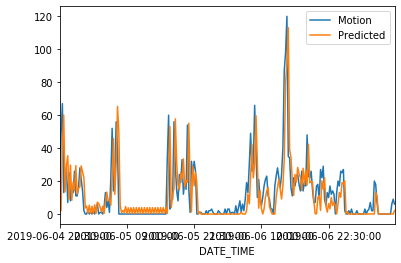

In [258]:
responseresultsfinal.plot(x="DATE_TIME",y=["Motion","Predicted"])


In [260]:
responseresultsfinal.to_csv('LSTM_WORKING.csv')